# Parsing & Structuring

Parsing (Ekstraksi Teks)

In [ ]:
import pdfplumber

with pdfplumber.open("Biografi1.pdf") as pdf:
    text = "\n".join([page.extract_text() for page in pdf.pages if page.extract_text()])

Structuring - Segmentasi Paragraf

In [ ]:
paragraphs = text.split("\n\n")

Structuring - Named Entity Recognition (NER)



*   Pakai stanza
- Memetakan relasi dengan SVO


In [ ]:
import spacy_stanza
import textacy.extract

nlp = spacy_stanza.load_pipeline("id")

doc = nlp(text)

svo_triples = list(textacy.extract.subject_verb_object_triples(doc))

print("\nRelasi SVO yang ditemukan:")
for triple in svo_triples:
    subj = " ".join(token.text for token in triple[0])
    verb = " ".join(token.text for token in triple[1])
    obj = " ".join(token.text for token in triple[2])
    print(f"({subj}) --[{verb}]--> ({obj})")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.11/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be al


Relasi SVO yang ditemukan:
(Habibie) --[menunjukkan]--> (kecil , 
)
(Habibie) --[menghabiskan]--> (Setelah pensiun dari politik ,)


# Visualisasi Knowledge Graph dengan NetworkX

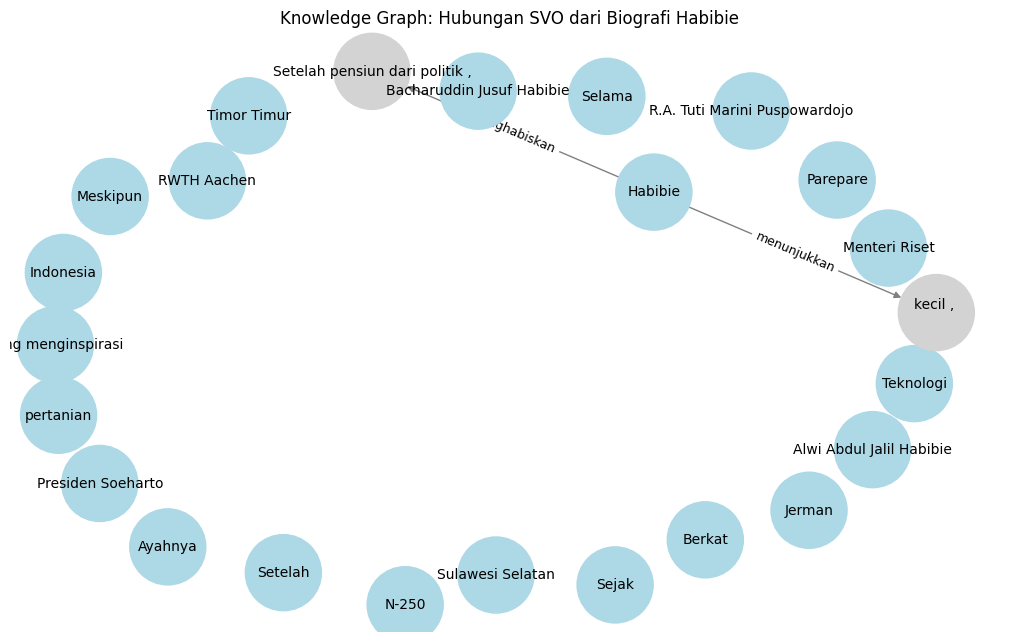

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for ent, label in entities.items():
    G.add_node(ent, label=label, color="lightblue")

for triple in svo_triples:
    subj = " ".join(token.text for token in triple[0])
    verb = " ".join(token.text for token in triple[1])
    obj = " ".join(token.text for token in triple[2])

    G.add_edge(subj, obj, label=verb)

pos = nx.spring_layout(G)

node_colors = ["lightblue" if G.nodes[n].get("color") == "lightblue" else "lightgray" for n in G.nodes]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=3000, font_size=10)

edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.5)

plt.title("Knowledge Graph: Hubungan SVO dari Biografi Habibie")
plt.show()


# RAG (Retrieval-Augmented Generation)

FAISS Knoladge Base

In [ ]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

import pdfplumber

with pdfplumber.open("Biografi1.pdf") as pdf:
    text = "\n".join([page.extract_text() for page in pdf.pages if page.extract_text()])

paragraphs = text.split("\n\n")

paragraph_embeddings = np.array(embedder.encode(paragraphs))

index = faiss.IndexFlatL2(paragraph_embeddings.shape[1])
index.add(paragraph_embeddings)

print("Knowledge Base dengan FAISS sudah dibuat!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Knowledge Base dengan FAISS sudah dibuat!


Pencarian Dokumen Relevan

In [ ]:
def search_knowledge_base(query, top_k=3):
    """Cari paragraf terkait dengan pertanyaan di FAISS."""
    query_embedding = np.array([embedder.encode(query)])
    D, I = index.search(query_embedding, top_k)

    results = [paragraphs[i] for i in I[0]]
    return results

query = "Bagaimana peran Habibie dalam dunia penerbangan?"
retrieved_docs = search_knowledge_base(query)

print("\nParagraf yang ditemukan:")
for doc in retrieved_docs:
    print("-", doc)



Paragraf yang ditemukan:
- Bacharuddin Jusuf Habibie lahir pada 25 Juni 1936 di Parepare, Sulawesi Selatan. Ia merupakan
anak keempat dari delapan bersaudara. Ayahnya, Alwi Abdul Jalil Habibie, adalah seorang ahli
pertanian, sementara ibunya, R.A. Tuti Marini Puspowardojo, adalah seorang guru. Sejak kecil,
Habibie menunjukkan minat yang besar dalam dunia teknologi dan sains.
Pada tahun 1955, setelah menyelesaikan pendidikan menengahnya di Indonesia, Habibie
melanjutkan studi ke RWTH Aachen, Jerman, mengambil jurusan teknik penerbangan. Selama
masa studinya, ia dikenal sebagai mahasiswa yang cerdas dan tekun. Setelah lulus dengan gelar
insinyur, ia melanjutkan studi doktoralnya dan meraih gelar doktor di bidang teknik penerbangan
dengan spesialisasi konstruksi pesawat terbang.
Habibie bekerja di berbagai perusahaan penerbangan di Jerman sebelum akhirnya kembali ke
Indonesia pada tahun 1974 atas permintaan Presiden Soeharto. Ia ditugaskan untuk membangun
industri kedirgantaraan nasional

# Model LLM

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "mistralai/Mistral-7B-Instruct-v0.3"

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float32,
    trust_remote_code=True
).to("cpu")

def generate_questions_from_text(text, num_questions=5):
    prompt = f"""Buatlah {num_questions} pertanyaan berbobot berdasarkan teks berikut:
    {text}

    Pertanyaan:
    """

    inputs = tokenizer(prompt, return_tensors="pt").to("cpu")
    outputs = model.generate(**inputs, max_new_tokens=200)

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

retrieved_texts = search_knowledge_base("B.J. Habibie dan dunia penerbangan", top_k=1)
context_text = "\n".join(retrieved_texts)

questions = generate_questions_from_text(context_text, num_questions=5)

print("\nPertanyaan yang dihasilkan:")
print(questions)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]